<a href="https://colab.research.google.com/github/thevivekrathi/Breast_Cancer_Detection/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Can we predict whether a cell is Malignant or Benign?**

#### All of our bodies are composed of cells. The human body has about 100 trillion cells within it. And usually, those cells behave in a certain way. However, occasionally, one of these 100 trillion cells, behave in a different way and keeps dividing and pushes the other cells around it out of the way. That cell stops observing the rules of the tissue within which it is located and begins to move out of its normal position and starts invading into the tissues around it and sometimes entering the bloodstream and becoming is called metastasis.

#### In summary, as we grow older, throughout a lifetime, we go through this kind of situation where a particular kind of gene is mutated where the protein that it makes is abnormal and drives the cell to behave in a different way that we call cancer.

#### This is what Dr. WIlliam H. Wolberg was observing and put together this dataset.

#### The dataset is available for download at:

### [UCI data repository](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)

### [Kaggle datasets](https://www.kaggle.com/roustekbio/breast-cancer-csv)


#### **Attribute Information:**

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)


#### **Malignant** is **Cancerous** and **Benign** is **Not Cancerous** (can be considered healthy)

## **Step 1: Downloading data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.color_palette("viridis", as_cmap=True)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#!wget --no-check-certificate \
#    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
#    -O "/tmp/happy-or-sad.zip"

In [3]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data' \
-O '/tmp/breast_cancer_data'

--2021-06-16 01:19:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19889 (19K) [application/x-httpd-php]
Saving to: ‘/tmp/breast_cancer_data’

/tmp/breast_cancer_ 100%[===================>]  19.42K  --.-KB/s    in 0.1s    

2021-06-16 01:19:41 (130 KB/s) - ‘/tmp/breast_cancer_data’ saved [19889/19889]



## **Step 2: Cleaning data**

In [4]:
column_names = ['id_number', 'clump_thickness',	'size_uniformity',	'shape_uniformity',\
                'marginal_adhesion',	'epithelial_size',	'bare_nucleoli',\
                'bland_chromatin',	'normal_nucleoli',	'mitoses',	'class' ]

data = pd.read_csv('/tmp/breast_cancer_data', index_col=False, names=column_names)

In [5]:
data.head()

,id_number,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
data.shape

(699, 11)

In [7]:
def glimpse(df):
  print('Shape of the dataset is: {}\n'.format(df.shape))
  print(f'Head of the dataset: \n{df.head()}\n')
  print(f'Missing Values in the dataset: \n{df.isnull().sum()}\n')
  print(f'Datatypes: \n{df.dtypes}\n')
  print(f'Describe: \n{df.describe()}\n')
  for column in df.columns:
    if df[column].dtypes == 'object':
      print(f'Categorical feature {column.upper()} has following values and counts: \n{df[column].value_counts()}')

In [8]:
glimpse(data)

Shape of the dataset is: (699, 11)

Head of the dataset: 
   id_number  clump_thickness  size_uniformity  ...  normal_nucleoli  mitoses  class
0    1000025                5                1  ...                1        1      2
1    1002945                5                4  ...                2        1      2
2    1015425                3                1  ...                1        1      2
3    1016277                6                8  ...                7        1      2
4    1017023                4                1  ...                1        1      2

[5 rows x 11 columns]

Missing Values in the dataset: 
id_number            0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

Datatypes: 
id_number             int64
clump_thickness       int64
size_uniformity       int64
shape_uniform

#### Column **bare_nucleoli** is considered a categorical attribute even though it contains numeric values. This is due to the prescence of **'?'** in the column. 

#### Let's replace that with **numpy.nan**. 



In [9]:
data1 = data.replace('?', np.nan)

In [10]:
data1.isnull().sum()

id_number             0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

#### Replacing the **"NaN"** values with the median of **bare_nucleoli**.

In [11]:
data1 = data1.fillna(data1.bare_nucleoli.median())

In [12]:
data1.isnull().sum()

id_number            0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

#### Even though we have replaced the missing values with the median of the remaining values, the **dtype** of the column still shows as **object**. Let's correct that before we move to the **EDA**.

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_number          699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [14]:
data1.bare_nucleoli = data1.bare_nucleoli.astype('int64')

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id_number          699 non-null    int64
 1   clump_thickness    699 non-null    int64
 2   size_uniformity    699 non-null    int64
 3   shape_uniformity   699 non-null    int64
 4   marginal_adhesion  699 non-null    int64
 5   epithelial_size    699 non-null    int64
 6   bare_nucleoli      699 non-null    int64
 7   bland_chromatin    699 non-null    int64
 8   normal_nucleoli    699 non-null    int64
 9   mitoses            699 non-null    int64
 10  class              699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


#### Dropping the column **id_number**

In [16]:
data1 = data1.drop('id_number', axis=1)

In [17]:
data1.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## **Step 3: EDA (Exploratory Data Analysis)**

In [18]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


### **Univariate** 

#### Looking at distribution of values in each column

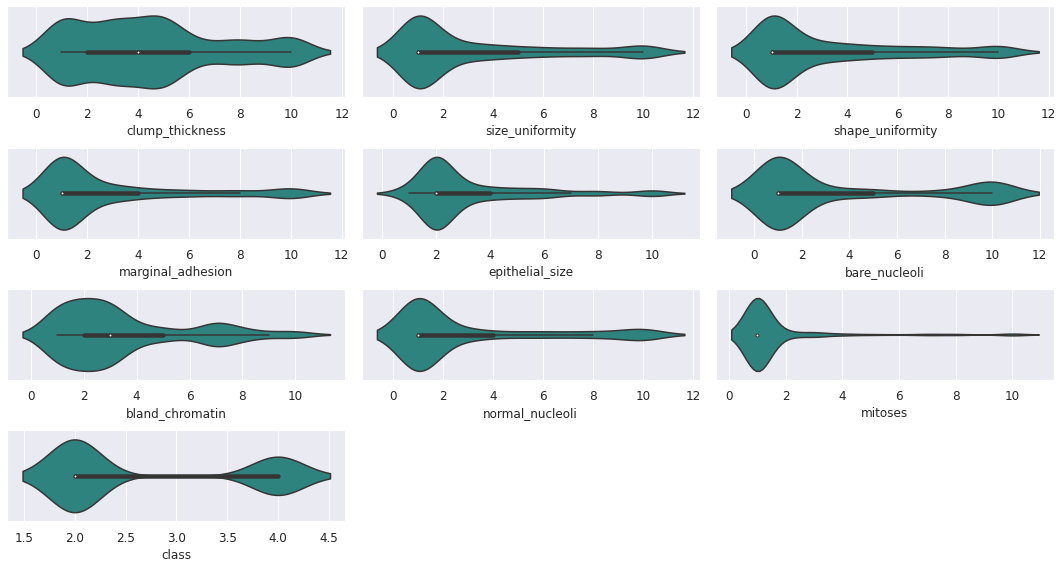

In [19]:
i = 1
plt.subplots(figsize=(15, 8))
for j in data1.columns:
  plt.subplot(4,3,i)
  plt.xticks(fontsize=12)
  sns.violinplot(data1[j], palette='viridis')
  i += 1

plt.tight_layout()
plt.show()

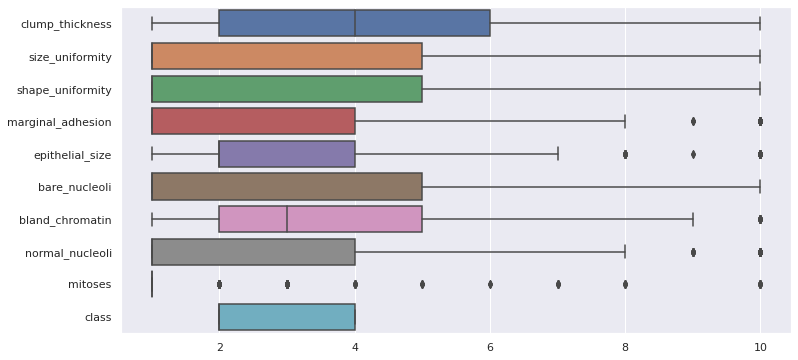

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data = data1, orient='h')

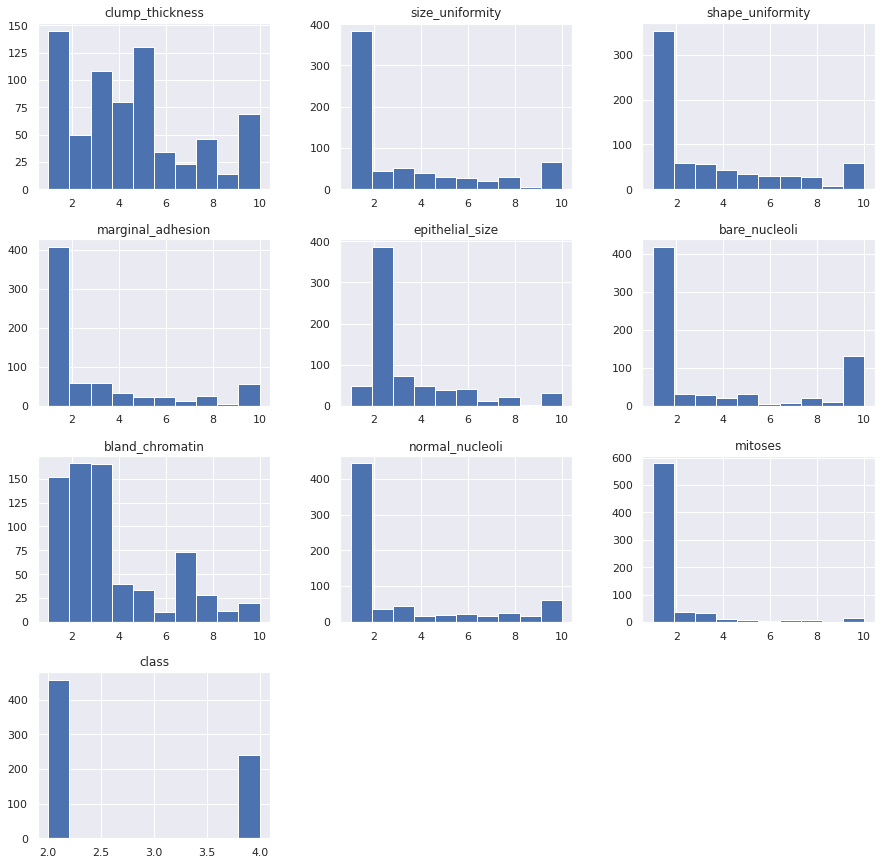

In [21]:
data1.hist(bins=10, figsize=(15,15), layout=(4,3));

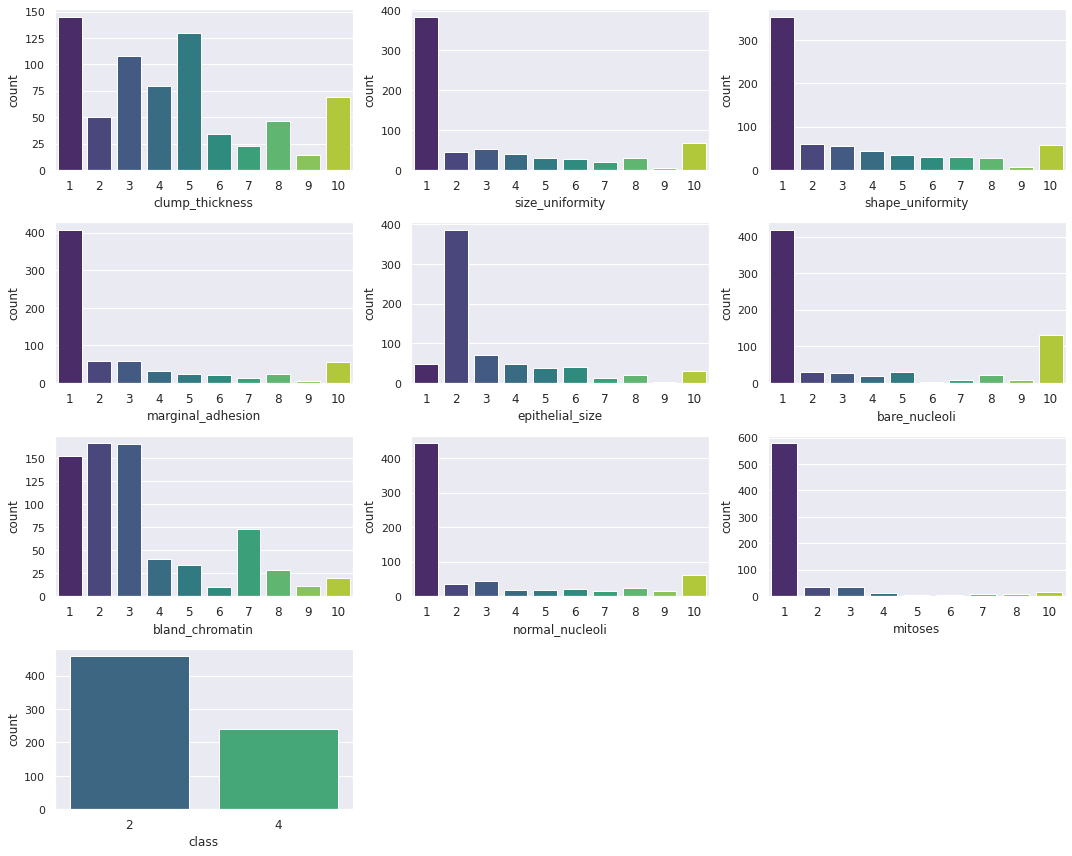

In [22]:
i = 1
plt.subplots(figsize=(15, 12))
for j in data1.columns:
  plt.subplot(4,3,i)
  plt.xticks(fontsize=12)
  #sns.color_palette("magma", as_cmap=True)
  sns.countplot(data1[j], palette='viridis')
  i += 1

plt.tight_layout()
plt.show()

#### As per the plots, we can notice few things,


*   data in **clump_thickness** is distributed among all the values 
*   data in other columns is distributed on the ends mostly
*   most of our data falls into **class 2** i.e. **benign** which is considered non critical



### **Bivariate**
#### Let's look at the relation between different attributes and also how all the attributes co-relates to the class

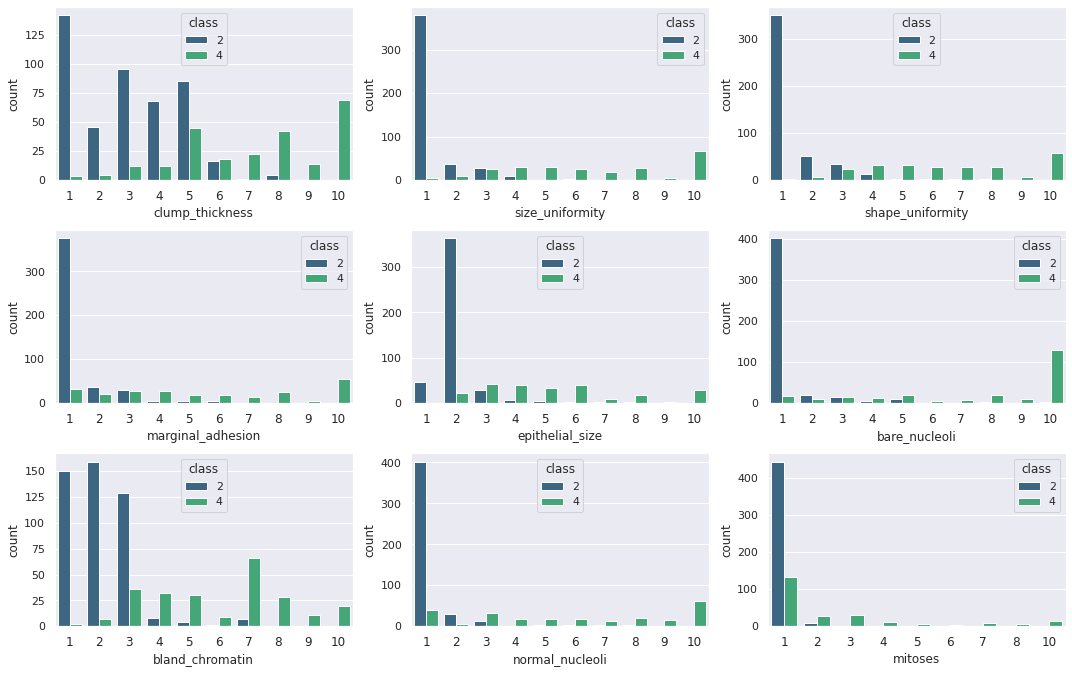

In [23]:
i = 1
plt.subplots(figsize=(15, 12))
for j in data1.drop('class', axis=1).columns:
  plt.subplot(4,3,i)
  plt.xticks(fontsize=12)
  sns.countplot(data1[j], hue=data1['class'], palette='viridis')
  i += 1

plt.tight_layout()
plt.show()

In [24]:
data1.corr()['class'].sort_values(ascending=False)

class                1.000000
bare_nucleoli        0.818968
shape_uniformity     0.818934
size_uniformity      0.817904
bland_chromatin      0.756616
clump_thickness      0.716001
normal_nucleoli      0.712244
marginal_adhesion    0.696800
epithelial_size      0.682785
mitoses              0.423170
Name: class, dtype: float64

### **Multivariate**

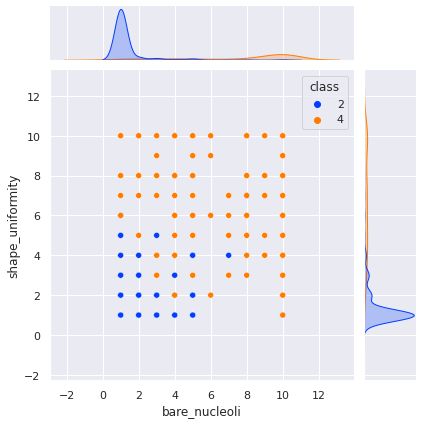

In [25]:
sns.jointplot(x=data1.bare_nucleoli, y=data1.shape_uniformity, hue=data1['class'], palette='bright')

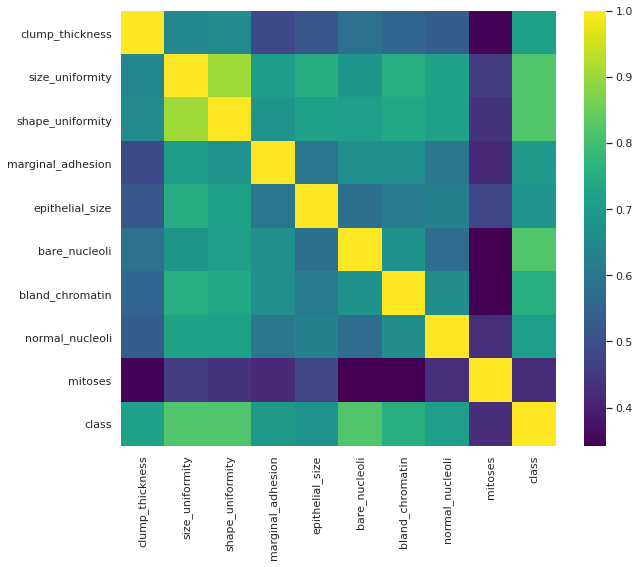

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(), vmax=True, cmap='viridis', square=True)

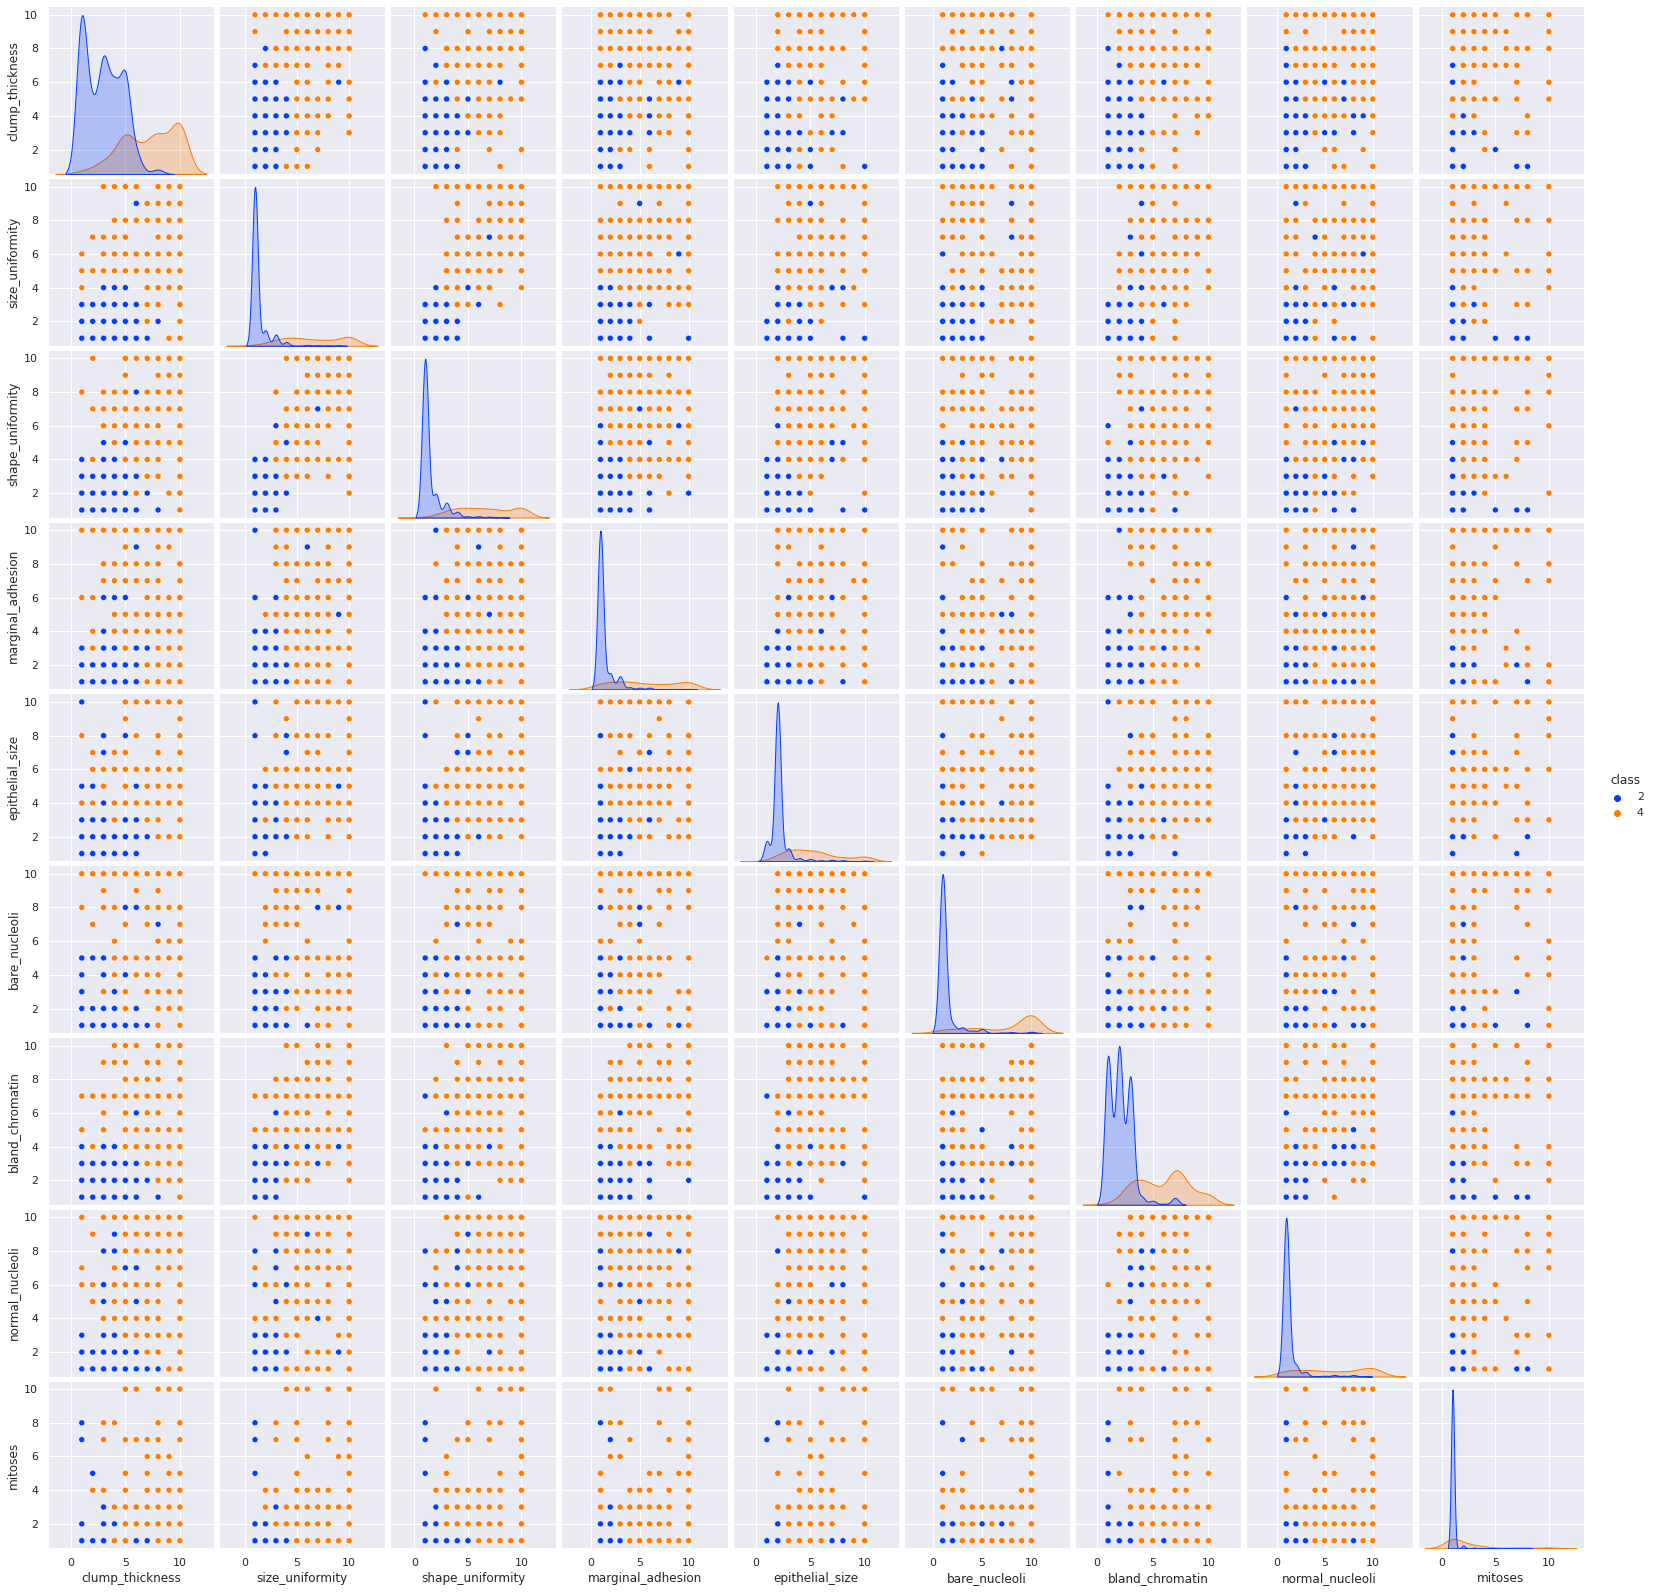

In [27]:
sns.pairplot(data = data1, diag_kind='kde', hue='class', palette='bright')

## **Step 4: Model Building**

#### Defining dependent and independent variables

In [28]:
y = data1['class']
X = data1.drop('class', axis=1)

In [29]:
X.shape, y.shape

((699, 9), (699,))

#### Splitting data into train and test, where we are keeping our test_size to 25% 

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [31]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(524, 9) (175, 9)
(524,) (175,)


### **KNN model: KNeighborsClassifier**


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [33]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
from sklearn.metrics import accuracy_score
print('KNeighborsClassifier model is predicting with {0:.2f}%'.format(accuracy_score(y_test, knn_model.predict(X_test)) * 100), 'accuracy')

KNeighborsClassifier model is predicting with 98.29% accuracy


### **SVC: Support Vector Classifier**

In [35]:
from sklearn.svm import SVC
svc_model = SVC(C=3, gamma=0.025)

In [36]:
svc_model.fit(X_train, y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
from sklearn.metrics import accuracy_score
print('SVC model is predicting with {0:.2f}%'.format(accuracy_score(y_test, svc_model.predict(X_test)) * 100), 'accuracy')

SVC model is predicting with 97.71% accuracy


In [38]:
predictions = pd.DataFrame()
predictions['knn_model'] = knn_model.predict(X_test)
predictions['svc_model'] = svc_model.predict(X_test)
predictions

,knn_model,svc_model
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
170,2,4
171,2,4
172,4,4
173,2,2


### **Classification Report**

#### **knn_model**

In [39]:
from sklearn.metrics import classification_report
print('knn Classification Report:\n',classification_report(y_test, knn_model.predict(X_test)))

knn Classification Report:
               precision    recall  f1-score   support

           2       0.98      0.99      0.99       118
           4       0.98      0.96      0.97        57

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175



[[117   1]
 [  2  55]]


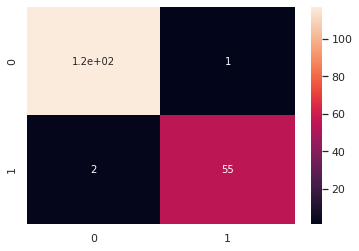

In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, knn_model.predict(X_test)))

sns.heatmap(confusion_matrix(y_test, knn_model.predict(X_test)), annot=True)

#### **svc_model**

In [41]:
from sklearn.metrics import classification_report
print('svc Classification Report:\n',classification_report(y_test, svc_model.predict(X_test)))

svc Classification Report:
               precision    recall  f1-score   support

           2       0.99      0.97      0.98       118
           4       0.95      0.98      0.97        57

    accuracy                           0.98       175
   macro avg       0.97      0.98      0.97       175
weighted avg       0.98      0.98      0.98       175



[[115   3]
 [  1  56]]


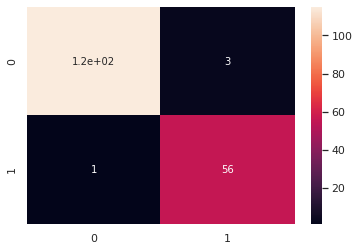

In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, svc_model.predict(X_test)))

sns.heatmap(confusion_matrix(y_test, svc_model.predict(X_test)), annot=True, )

### Using **k-Fold cross validation** to test multiple models and find out the best one.

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

def find_best_model(X_train, y_train, X_test, y_test):
    '''
    Lightweight script to test many models and find winners
    '''
    
    dfs = []
    models = [
              ('KNN', KNeighborsClassifier()),
              ('SVC', SVC()), 
            ]
    
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['malignant', 'benign']
    for name, model in models:
            kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
            cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
            clf = model.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            print(name)
            print(classification_report(y_test, y_pred, target_names=target_names))
            results.append(cv_results)
            names.append(name)
            this_df = pd.DataFrame(cv_results)
            this_df['model'] = name
            dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    
    return final

In [44]:
find_best_model(X_train, y_train, X_test, y_test)

KNN
              precision    recall  f1-score   support

   malignant       0.98      0.99      0.99       118
      benign       0.98      0.96      0.97        57

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175

SVC
              precision    recall  f1-score   support

   malignant       0.99      0.99      0.99       118
      benign       0.98      0.98      0.98        57

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175



,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.003120,0.015976,0.923810,0.923810,0.923810,0.923810,0.962308,KNN
1,0.002037,0.008982,0.961905,0.964179,0.961905,0.961538,0.987528,KNN
2,0.001387,0.008414,0.961905,0.961905,0.961905,0.961905,0.990058,KNN
3,0.001340,0.010394,0.942857,0.947445,0.942857,0.943673,0.980008,KNN
4,0.001470,0.008487,0.980769,0.980769,0.980769,0.980769,0.990890,KNN
5,0.002667,0.005008,0.942857,0.944067,0.942857,0.943108,0.970385,SVC
6,0.002761,0.005821,0.971429,0.972727,0.971429,0.971232,0.998488,SVC
7,0.002792,0.004897,0.961905,0.961905,0.961905,0.961905,0.997514,SVC
8,0.002517,0.004875,0.933333,0.945000,0.933333,0.934827,0.981061,SVC
9,0.002670,0.004915,0.990385,0.990652,0.990385,0.990417,0.987164,SVC


#### From the above experiment, we could see that Support Vector Classifier is doing the best, so that is what we will use.

#### When compared to other models, SVC has the best precision **(Precision = TP/TP+FP)** and recall **(Recall = TP/TP+FN)**.

#### Let's create the final true model.

SVC model is predicting with 98.86%
 accuracy
SVC Classification Report:
               precision    recall  f1-score   support

           2       0.99      0.99      0.99       118
           4       0.98      0.98      0.98        57

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175
 

Confusion Matrix: 
 [[117   1]
 [  1  56]] 



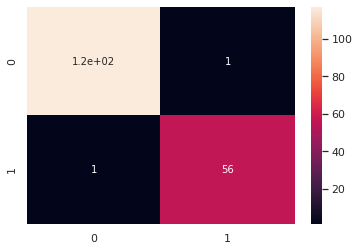

In [45]:
from sklearn.svm import SVC
true_svc_model = SVC()

true_svc_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print('SVC model is predicting with {0:.2f}%\n'.format(accuracy_score(y_test, true_svc_model.predict(X_test)) * 100), 'accuracy')

from sklearn.metrics import classification_report
print('SVC Classification Report:\n',classification_report(y_test, true_svc_model.predict(X_test)),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, true_svc_model.predict(X_test)),'\n')

sns.heatmap(confusion_matrix(y_test, true_svc_model.predict(X_test)), annot=True, );

#### Saving our true model as a file **'breast_cancer_detection.pkl'** using **pickle.dump**

#### We can then load the same using **pickle.load** and make predictions by passing all the attributes used during the training process

In [46]:
import pickle
pickle.dump(true_svc_model, open('breast_cancer_detection.pkl', 'wb'))

In [47]:
the_saved_model = pickle.load(open('breast_cancer_detection.pkl', 'rb'))

In [48]:
print('Accuracy of the saved model is {0:.2f}%'.format(accuracy_score(y_test, the_saved_model.predict(X_test))*100))

Accuracy of the saved model is 98.86%


In [49]:
X_test[:1]

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
584,5,1,1,6,3,1,1,1,1


In [50]:
print(y[1])

2


In [51]:
the_saved_model.predict([[5,1,1,6,3,1,1,1,1]])

array([2])

In [52]:
the_saved_model.predict([[4,3,6,2,2,5,2,9,1]])

array([4])